In [1]:
train = 'train'
test = 'test'

eng = 'english'
arm = 'armania'

languages = [arm, eng]
categories = [train, test]

dataset_root_path = 'E:/data/'

sample_rate = 8000
image_width = 500
image_height = 128

In [2]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [3]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)

In [4]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

In [5]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

In [6]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

In [7]:
audio_files = {}

for lang in languages:
    for category in categories:
        dataset_path = dataset_root_path + category + '/' + lang
        
        # If you wish to preprocess all data use the following command
        #audio_files[lang + '.' + category] = glob(dataset_path + '/*.mp3') + glob(dataset_path + '/*.wav')
        
        # If you only wish to preprocess augmented data use the following command
        audio_files[lang + '.' + category] = glob(dataset_path + '/*.wav')
        

print(audio_files.keys())


dict_keys(['armania.train', 'armania.test', 'english.train', 'english.test'])


In [8]:
key = list(audio_files.keys())[0]
audio_file = audio_files[key][4]
audio_file

'E:/data/train/armania\\common_voice_hy-AM_26058869.wav'

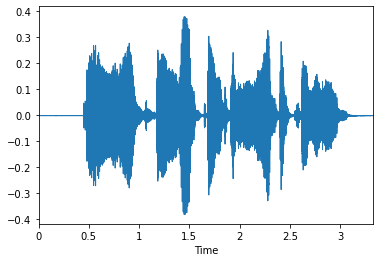

In [9]:
audio = load_audio_file(audio_file)

waveplot(audio, sr=sample_rate)
plt.show()

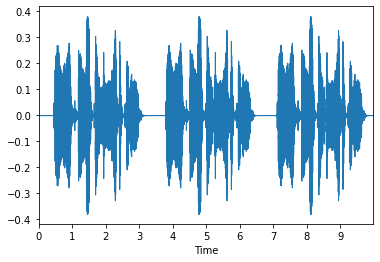

In [10]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

waveplot(audio_fixed, sr=sample_rate)
plt.show()

In [11]:
Audio(audio, rate=sample_rate)

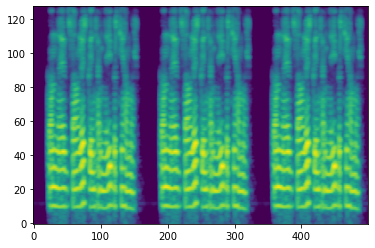

In [12]:
spectro = spectrogram(audio_fixed)

plt.imshow(spectro, origin='lower', aspect='auto')
plt.show()

In [13]:
spectro.shape

(128, 500)

In [14]:
def audio_to_image_file(audio_file):
    out_image_file = audio_file + '.png'
    audio = load_audio_file(audio_file)
    audio_fixed = fix_audio_segment_to_10_seconds(audio)
    if np.count_nonzero(audio_fixed) != 0:
        spectro = spectrogram(audio_fixed)
        spectro_int = to_integer(spectro)
        imageio.imwrite(out_image_file, spectro_int)
    else:
        print('WARNING! Detected an empty audio signal. Skipping...')

In [15]:

for lang in languages:
    
    for category in categories:
        all_audio_files = audio_files[lang + '.' + category]
        
        num_files = len(all_audio_files)
        
        for i in range(num_files):
            if i % (num_files / 8) == 0:
                print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
            audio_to_image_file(all_audio_files[i])

Still processing armania train 0/160
Still processing armania train 20/160
Still processing armania train 40/160
Still processing armania train 60/160
Still processing armania train 80/160
Still processing armania train 100/160
Still processing armania train 120/160
Still processing armania train 140/160
Still processing armania test 0/20
Still processing armania test 5/20
Still processing armania test 10/20
Still processing armania test 15/20
Still processing english train 0/160
Still processing english train 20/160
Still processing english train 40/160
Still processing english train 60/160
Still processing english train 80/160
Still processing english train 100/160
Still processing english train 120/160
Still processing english train 140/160
Still processing english test 0/20
Still processing english test 5/20
Still processing english test 10/20
Still processing english test 15/20
